In [1]:
import xarray as xr
from scipy.ndimage import label

import numpy as np
import pandas as pd
import veg_transition
import glob
from pathlib import Path

from veg_transition import VegTransition
import matplotlib.pyplot as plt

from hsi import HSI

## Create analog-years scenario data

In [ ]:
paths = glob.glob("./sequences/*.csv")


years_mapping = {
    1: 2006,
    2: 2023,
    3: 2022,
    4: 2021,
    5: 2019,
}

seqs = {}
for p in paths:
    name = Path(p).stem
    seqs[name] = pd.read_csv(p, skiprows=1)

In [ ]:
# Define the source and output folder paths
# source_folder = "/Users/dillonragar/data/tmp/cpra/AMP_SimulationResults/"
source_folder = "/Users/dillonragar/data/cpra/AMP_SimulationResults/base/"
output_folder = "/Users/dillonragar/data/tmp/cpra/base-sequence-wet/"
# Generate the combined sequence
utils.generate_combined_sequence(
    seqs["wet_sequence"],
    years_mapping,
    source_folder,
    output_folder,
)


output_folder = "/Users/dillonragar/data/tmp/cpra/base-sequence-dry/"
# Generate the combined sequence
utils.generate_combined_sequence(
    seqs["dry_sequence"],
    years_mapping,
    source_folder,
    output_folder,
)


output_folder = "/Users/dillonragar/data/tmp/cpra/base-sequence-moderate/"
# Generate the combined sequence
utils.generate_combined_sequence(
    seqs["moderate_sequence"],
    years_mapping,
    source_folder,
    output_folder,
)

In [ ]:
# Define the source and output folder paths


# source_folder = "/Users/dillonragar/data/tmp/cpra/AMP_SimulationResults/"
source_folder = "/Users/dillonragar/data/cpra/AMP_SimulationResults/2ft_slr/"
output_folder = "/Users/dillonragar/data/tmp/cpra/2ft-slr-sequence-wet/"
# Generate the combined sequence
utils.generate_combined_sequence(
    seqs["wet_sequence"],
    years_mapping,
    source_folder,
    output_folder,
)


output_folder = "/Users/dillonragar/data/tmp/cpra/2ft-slr-sequence-dry/"
# Generate the combined sequence
utils.generate_combined_sequence(
    seqs["dry_sequence"],
    years_mapping,
    source_folder,
    output_folder,
)


output_folder = "/Users/dillonragar/data/tmp/cpra/2ft-slr-sequence-moderate/"
# Generate the combined sequence
utils.generate_combined_sequence(
    seqs["moderate_sequence"],
    years_mapping,
    source_folder,
    output_folder,
)

## Run VegTransition model

In [11]:
Veg = VegTransition(config_file="./configs/veg_config_testing.yaml")
Veg.run()
Veg.post_process()

2025-06-11 16:13:25,203 - VegTransition_13318372480 - INFO - [Timestep: N/A] - Logger setup complete.
INFO:VegTransition_13318372480:Logger setup complete.
2025-06-11 16:13:25,208 - VegTransition_13318372480 - INFO - [Timestep: N/A] - Loaded Configuration:
raster_data:
  dem_path: /Users/dillonragar/data/cpra/AMP_NGOM2_DEM_60m_Bilinear_Resample.tif
  wse_domain_raster: /Users/dillonragar/data/cpra/HECRAS_domain_60m.tif
  netcdf_hydro_path: /Users/dillonragar/data/tmp/cpra/G999
  veg_base_raster: /Users/dillonragar/data/cpra/AMP_10km_LULC_60m_Nearest_Resample/AMP_10kmBuffer_LULC_60m_Nearest_Resample.tif
  veg_keys: /Users/dillonragar/data/cpra/AMP_10km_LULC_60m_Nearest_Resample/AMP_10kmBuffer_LULC_60m_Nearest_Resample.tif.vat.dbf
  wpu_grid: /Users/dillonragar/Library/CloudStorage/OneDrive-LynkerTechnologies/2024
    CPRA Atchafalaya DSS/data/WPU_id_60m.tif
  salinity_raster: null
  veg_type_path: /Users/dillonragar/data/cpra/AMP_VEG_S04_AB_O_ANN_01_25_DATA_20250321_143558/AMP_VEG_S04_A

In [ ]:
Veg = VegTransition(config_file="./configs/veg_config_2ft_slr_dry.yaml")
Veg.run()
Veg.post_process()

In [ ]:
Veg = VegTransition(config_file="./configs/veg_config_2ft_slr_moderate.yaml")
Veg.run()
Veg.post_process()

In [ ]:
Veg = VegTransition(config_file="./configs/veg_config_2ft_slr_wet.yaml")
Veg.run()
Veg.post_process()

In [ ]:
Veg = VegTransition(config_file="./configs/veg_config_base_dry.yaml")
Veg.run()
Veg.post_process()

In [ ]:
Veg = VegTransition(config_file="./configs/veg_config_base_moderate.yaml")
Veg.run()
Veg.post_process()

In [ ]:
Veg = VegTransition(config_file="./configs/veg_config_base_wet.yaml")
Veg.run()
Veg.post_process()

In [ ]:
Veg = VegTransition(config_file="./configs/veg_config_1-08ft_slr_wet.yaml")
Veg.run()
Veg.post_process()

In [ ]:
Veg = VegTransition(
    config_file="./configs/veg_config_1-08ft_slr_moderate.yaml"
)
Veg.run()
Veg.post_process()

In [ ]:
Veg = VegTransition(config_file="./configs/veg_config_1-08ft_slr_dry.yaml")
Veg.run()
Veg.post_process()

## Run HSI models

In [ ]:
hsi = HSI(config_file="./configs/hsi_config_testing.yaml")
hsi.run()

2025-04-29 11:25:00,829 - HSI_12925549264 - INFO - [Timestep: N/A] - Logger setup complete.
2025-04-29 11:25:00,834 - HSI_12925549264 - INFO - [Timestep: N/A] - Loaded Configuration:
raster_data:
  dem_path: /Users/dillonragar/data/cpra/AMP_NGOM2_DEM_60m_Bilinear_Resample.tif
  wse_directory_path: /Users/dillonragar/data/tmp/cpra/2ft-slr-sequence-moderate
  wse_domain_raster: /Users/dillonragar/data/cpra/HECRAS_domain_60m.tif
  veg_base_raster: /Users/dillonragar/data/cpra/AMP_10km_LULC_60m_Nearest_Resample/AMP_10kmBuffer_LULC_60m_Nearest_Resample.tif
  veg_keys: /Users/dillonragar/data/cpra/AMP_10km_LULC_60m_Nearest_Resample/AMP_10kmBuffer_LULC_60m_Nearest_Resample.tif.vat.dbf
  wpu_path: /Users/dillonragar/Library/CloudStorage/OneDrive-LynkerTechnologies/2024
    CPRA Atchafalaya DSS/data/WPU_id_60m.tif
  salinity_raster: null
  veg_type_path: /Users/dillonragar/data/cpra/AMP_VEG_S04_G510_AB_O_ANN_01_25_DATA/AMP_VEG_S04_G510_AB_O_ANN_01_25_DATA.nc
  flotant_marsh_raster: /Users/dillo

In [5]:
hsi.testing_radius

In [ ]:
forested_types = [15, 16, 17, 18]
forest_bool = np.isin(hsi.veg_type, forested_types)

# label all contiguous forest patches once
labeled_array, num_features = label(forest_bool)

# count pixels in each labeled region
region_sizes = np.bincount(labeled_array.ravel())

# now create a new array assigning a "connectivity category" to each pixel
connectivity_category = np.zeros_like(labeled_array)

for region_id, size in enumerate(region_sizes):
    if region_id == 0:
        continue  # skip background
    if size <= 6:
        connectivity_category[labeled_array == region_id] = 1
    elif size <= 23:
        connectivity_category[labeled_array == region_id] = 2
    elif size <= 113:
        connectivity_category[labeled_array == region_id] = 3
    elif size <= 562:
        connectivity_category[labeled_array == region_id] = 4
    else:  # very large patches
        connectivity_category[labeled_array == region_id] = 5

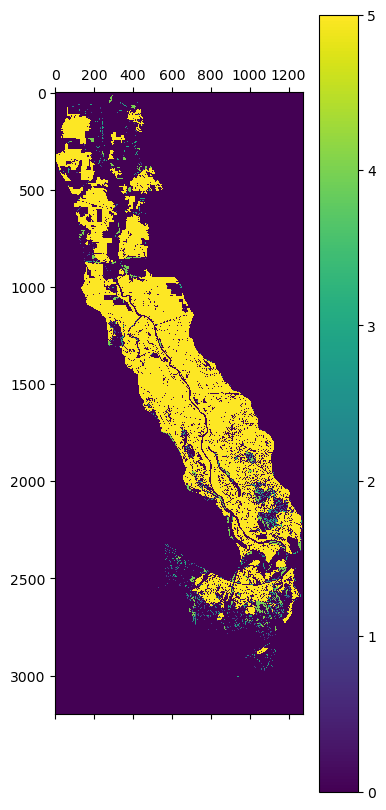

In [15]:
plt.matshow(connectivity_category)
plt.colorbar()

In [12]:
region_sizes

array([3346078,     352,       1, ...,       1,       1,       1],
      shape=(11355,))

In [ ]:
hsi = HSI(config_file="./configs/hsi_config_1-08ft_slr_moderate.yaml")
hsi.run()
hsi.post_process()

In [ ]:
hsi = HSI(config_file="./configs/hsi_config_1-08ft_slr_wet.yaml")
hsi.run()
hsi.post_process()

In [ ]:
hsi = HSI(config_file="./configs/hsi_config_2ft_slr_dry.yaml")
hsi.run()
hsi.post_process()

In [ ]:
hsi = HSI(config_file="./configs/hsi_config_2ft_slr_moderate.yaml")
hsi.run()
hsi.post_process()

In [ ]:
hsi = HSI(config_file="./configs/hsi_config_2ft_slr_wet.yaml")
hsi.run()
hsi.post_process()

In [ ]:
hsi = HSI(config_file="./configs/hsi_config_base_dry.yaml")
hsi.run()
hsi.post_process()

In [ ]:
hsi = HSI(config_file="./configs/hsi_config_base_moderate.yaml")
hsi.run()
hsi.post_process()

In [ ]:
hsi = HSI(config_file="./configs/hsi_config_base_wet.yaml")
hsi.run()
hsi.post_process()